# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [28]:
medical.shape

(1338, 8)

In [29]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

13270.422265141257 9382.033 12110.011236693994


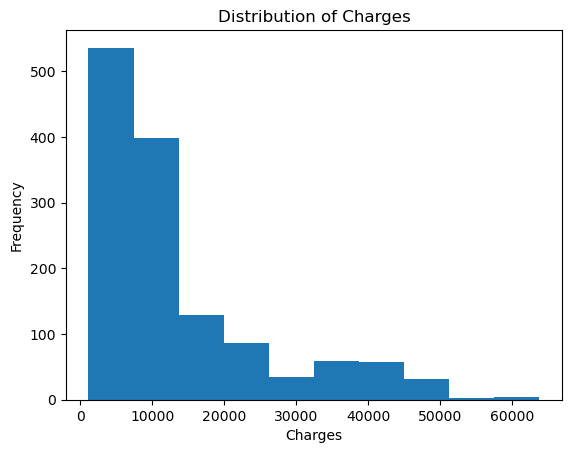

In [30]:
# Calculate mean, median, and standard deviation of the charges
mean_charge = medical['charges'].mean()
median_charge = medical['charges'].median()
std_charge = medical['charges'].std()

print(mean_charge, median_charge, std_charge)

# Plot the histogram of charges
plt.hist(medical['charges'], bins=10)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

#Given the skew in this dataset, the median is a superior metric to employ here than the mean.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
To justify that these data allow us to answer the administrator's question, we must confirm that the data are representative of the hospital's charges and that they provide a random sample. Given that assumption, we can use the sample data to make inferences about the population mean charge.

The appropriate frequentist test to determine if the average charge has fallen below $12,000 would be a one-sample t-test. This test will allow us to compare the sample mean to the threshold value of $12,000 and determine if there is a statistically significant difference.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [31]:
#Q3: 
# Given the nature of the administrator's concern, a one-tailed test is appropriate. The null hypothesis is that the mean charge has not increased from the previous year. The alternative hypothesis is that the mean charge has increased from the previous year. The significance level is 0.05.

# Calculate the sample mean and standard error
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
n = len(medical['charges'])
standard_error = sample_std / np.sqrt(n)

# One-sided 95% confidence interval
confidence_level = 0.95
z_score_one_sided = norm.ppf(confidence_level)
margin_of_error_one_sided = z_score_one_sided * standard_error

# Calculate the lower bound of the one-sided confidence interval
confidence_interval_one_sided = (sample_mean - margin_of_error_one_sided, np.inf)
confidence_interval_one_sided, sample_mean > 12000

#Since the lower bound of this one-sided confidence interval is $12,725.86> $12,000, we can conclude that the mean charge is significantly above $12,000. Therefore, the administrator should not be concerned based on this sample data.


((12725.864762144516, inf), True)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
The null hypothesis is that there is no difference between the mean charges for insured and  uninsured patients and the alternative hypothesis is that there is a difference in mean charges between insured and uninsured patients. The assumption we are making about the 2 groups is that the variances are homogeneous between and within them.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [32]:
# Q5: Manual calculation of t-test
# Separate charges for insured and uninsured patients
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate the means
mean_insured = np.mean(insured)
mean_uninsured = np.mean(uninsured)

# Calculate the standard deviations
std_insured = np.std(insured, ddof=1)
std_uninsured = np.std(uninsured, ddof=1)

# Calculate the sample sizes
n_insured = len(insured)
n_uninsured = len(uninsured)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((n_insured - 1) * std_insured**2 + (n_uninsured - 1) * std_uninsured**2) / (n_insured + n_uninsured - 2))

# Calculate the t-statistic
t_stat_manual = (mean_insured - mean_uninsured) / (pooled_std * np.sqrt(1/n_insured + 1/n_uninsured))

# Calculate the degrees of freedom
df = n_insured + n_uninsured - 2

# Calculate the p-value
p_value_manual = 2 * (1 - t.cdf(abs(t_stat_manual), df))

print("Manual values: ", t_stat_manual, p_value_manual)


# Q5: Using scipy.stats function
t_stat, p_value = ttest_ind(insured, uninsured)
t_stat, p_value

print("Stat values: ", t_stat, p_value)


#Given the 2 methods produce near-equivalent results, the t-statistic is high, and the p-value is less than 0.05, we can reject the null hypothesis that the mean charges for insured and uninsured patients are the same. Therefore, the mean charges for insured and uninsured patients are significantly different.

Manual values:  11.893299030876715 0.0
Stat values:  11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ In the scipy.stats module, there is no direct function for a z-test for a sample mean similar to the ttest_ind function like for the t-test, since z-tests are typically used when the population standard deviation is known and the sample size is large. So in practice, the t-test can be used in lieu of the z-test when dealing with sample data. However, one can manually perform a z-test by calculating the z-score and p-value using the normal distribution functions available in scipy.stats.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test